<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap5_Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 5.1 사다리꼴 방법

기본 사다리꼴 등식 : $\int^{b}_{a}{f(x)dx}\approx \frac{1}{2}\sum^{n-1}_{i=0}{(x_{i+1}- x_{i})[(f(x_{i})+f(x_{i+1}))]}$

등간격 분할 구간 Partition $P$에 대한 사다리꼴 공식 : $\int^{b}_{a}{f(x)dx}\approx T(f\;; P) = \frac{h}{2}[f(x_{0}) + f(x_{n})] + h\sum^{n-1}_{i=1}{f(x_{i})} \:\:\: (h = x_{i+1} - x_{i} = (b-a)/n)$

오차 함수 error funciton을 통해 적분에 대한 근사의 성능을 판단할 수 있다.
</br></br>
$\boxtimes$ **정리 1** 복합 사다리꼴 공식의 정밀도에 대한 정리

만일 $f''$이 구간 $[a,b]$에서 존재하고 연속이며, 적분 $I = \int^{b}_{a}{f(x)}$를 근사하기 위해 균등한 $h$ 간격의 분할로 복합 사다리꼴 공식 $T$가 사용되었다면 구간 $(a,b)$에 속하는 어떤 $\zeta$에 대하여 다음이 성립한다.

$$I - T = -\frac{1}{12}(b-a)h^{2}f''(\zeta) = \mathcal{O}(h^2)$$

**증명**

먼저 단일 구간에 대해서 증명한다. 단일 구간 $[x_{i}, x_{i+1}]$내의 두 점을 이용하여 $f$를 보간하는 1차 다항식은 다음과 같다.

$$f(x) \approx p_{1}(x) = f(x_{i}) + \frac{[f(x_{i+1})-f(x_{i})]}{x_{i+1} - x_{i}}(x - x_{i})$$

$$\int{p_{1}{(x)}}=f(x_{i})(x_{i+1}- x_{i}) + \frac{1}{2}[f(x_{i+1})-f(x_{i})](x_{i}- x_{i+1}) = \frac{1}{2}[f(x_{i+1})+f(x_{i})](x_{i}- x_{i+1})$$

보간 오차 정리에 의해 다음을 얻는다.

$$f(x) - p_{1}(x) = \frac{1}{(n+1)!}f^{(n+1)}(\xi)\prod^{n}_{i=1}(x-x_{i}) = \frac{1}{2}f''(\xi)(x - x_{i+1})(x-x_{i}) \cdots (1)$$

이 때, $\xi$는 구간 $(x_{i}, x_{i+1})$내의 점이다.

식 (1)을 적분을 통해 다음 식을 얻을 수 있다.

$$\int{(f(x) - p_{1}(x))} = \int{\frac{1}{2}f''(\xi)(x_{i+1}-x_{i})} = \frac{f''(\xi)}{2}\int{(x - x_{i+1})(x-x_{i})dx} = -\frac{f''(\xi)(x_{i+1}-x_{i})^3}{12}$$

$$\int^{b}_{a} f(x) = \frac{h}{2}\sum^{n-1}_{i=0}[f(x_{i+1})+f(x_{i})] - \frac{h^3}{12}\sum^{n-1}_{i=0}f''(\xi_{i})$$

위 식의 마지막 항이 오차항이다.

$$- \frac{h^3}{12}\sum^{n-1}_{i=0}f''(\xi_{i}) = - \frac{(b-a)}{12}h^{2}[\frac{1}{n}\sum^{n-1}_{i=0}f''(\xi_{i})] = - \frac{(b-a)}{12}h^{2}f''(\zeta)$$

사잇값 정리에 의해 각 구간별 오차의 평균은 해당 오차들의 최솟값과 최댓값 사이에 있음을 알 수 있다.

적분 $\int^{1}_{0}{\frac{sin(x)}{x}dx}$와 같은 꼴의 함수는 사다리꼴 공식을 사용하여 오차의 상한 등을 구할 때, 일반적인 미분법으로 구하는 것을 좋지 않다. 각 미분이 $x$의 음의 지수를 포함하기 때문이다.

이런 경우, 테일러 급수를 이용하는 것도 하나의 방법이다.

$$f(x) = 1 - \frac{x^2}{3!} + \frac{x^{4}}{5!} - \cdots$$
</br></br>
$$f''(x) = -\frac{2}{3!} + \frac{3\times4x^{2}}{5!} - \frac{5\times6x^{4}}{7!} + \cdots$$

$\boxtimes$ **정리 2** 재귀 사다리꼴 공식

구간을 $n$ 개가 아닌 $2^n$개로 나누었을 때의 복합 사다리꼴 공식을 적용한 값을 **$R(n, 0)$**이라 하고 롬베르크 알고리즘에서 사용한다.

$$R(n, 0) = h\sum^{2^{n}-1}_{i=1}{f(a+ih)} +\frac{h}{2}{[f(a)+f(b)]}$$

만일 $R(n-1, 0)$이 이미 계되어 있고, $R(n, 0)$을 계산해야 한다면 다음 등식을 활용한다.
$$R(n, 0) = \frac{1}{2}R(n-1, 0) + [R(n, 0) - \frac{1}{2}R(n-1, 0)] = \frac{1}{2}R(n-1, 0) + h\sum^{2^{n}-1}_{k=1}{f(a+(2k-1)h)}$$

In [ ]:
def Trapezoid(f, a, b, n):
  df = []
  h = (b-a)/n
  T = h/2*(f(a)+f(b))
  for i in range(n-1):
    i = i+1
    T += h*f(a + h*i)
    df.append(T)

  df = pd.DataFrame(df)
  #print(df)
  return T

In [ ]:
#ex1

def ex1(x):
  if x==0:
    #print(1)
    return 1

  #print((np.sin(x))/x)
  return np.sin(x)/x

a= Trapezoid(ex1, 0, 1, 5)
a

0.945078780953402

In [ ]:
#3
def f3(x):
  return 4/(1+x**2)

Trapezoid(f3, 0, 1, 408) - np.pi

-1.0012174787021877e-06

In [ ]:
Trapezoid(f3, 0, 1, 409) - np.pi

-9.963275373614522e-07

In [ ]:
## 오차를 1e-6 보다 작기 위해 필요한 n
#h^2 < 6*1e-6
#h < np.sqrt(6)*1e-3
#n > 1000 * 1/np.sqrt(6)
1000 /np.sqrt(6)

408.24829046386304

In [ ]:
#5
def f5(x):
  return np.exp(-x**2)

Trapezoid(f5, 0, 500, 1000) - np.sqrt(np.pi/2)

-0.36708721186274207

In [ ]:
def f52(x):
  return x**2 * np.log(x)

Trapezoid(f52, 1/np.exp(500), 1, 1000) - np.sqrt(np.pi/2)

-1.3644251650628323

In [ ]:
Trapezoid(ex1, 0.001, 500, 1000) - np.pi/2

0.0007395755619785671

In [ ]:
def f54(x):
  return np.sin(1/x)/x
Trapezoid(f54, 1/500, 1/0.001, 1000) - np.pi/2

-117.04519975455838

In [ ]:
def f55(x):
  return np.sin(x**2)

Trapezoid(f55, 0, 500, 1000) - np.sqrt(np.pi/2)/2

8.88760595894692

In [ ]:
def f56(x):
  return np.sin(np.square(np.tan(x)))/(1+x**2)

Trapezoid(f56, 0, np.arctan(500), 1000) - np.sqrt(np.pi/2)/2

-0.3866860262377112

In [ ]:
np.arctan(500)

1.5687963294615568

In [ ]:
#7
def f7(x):
  return np.exp(-x**2)

Trapezoid(f7, 0, 1, 59)

0.7468065189579857

In [ ]:
#9
Trapezoid(ex1, 0, 1, 800)

0.9460830311525118

In [ ]:
#11
def f111(x):
  a = np.sqrt(1-4*x**2)
  b = -4*x/a
  return b



print('타원의 길이 : {}'.format(4*Trapezoid(f111, 0, 1/2-1e-6, 1000)))

타원의 길이 : -4.869158784533112


# 5.2 롬베르크 알고리즘


롬베르크 알고리즘 romberg algorithm은 수의 삼각배열을 생성하며 이 배열의 모든 수들의 정적분 $\int^{b}_{a}{f(x)dx}$에 대한 수치적 근삿값이다.

\begin{equation}
\begin{matrix}
R(0, 0) & & & \\
R(1, 0) & R(1, 1) & & \\
R(2, 0) & R(2, 1) & R(2, 2) & \\
R(3, 0) & R(3, 1) & R(3, 2) & R(3, 3)  &\\
\vdots & \vdots & \vdots & \vdots & \ddots\\
R(n, 0) & R(n,1) & R(n, 2) & R(n,3) & \cdots & R(n,n)
\end{matrix}
\end{equation}

첫째 열은 재귀 사다리꼴 공식에서 부분구간의 길이를 절반씩 줄여가며 $2^{n}$개의 등간격인 부분구간에 사다리꼴 공식을 적용한 결과이다.

그 중 $R(0, 0)$은 단 하나의 사다리꼴로 얻어진 값이다.

롬베르크 배열의 둘째 열부터 이어지는 열들은 다음 보외법 공식에 의해 생성된다.

$$R(n, m) = R(n, m-1) + \frac{1}{4^{m} -1}[R(n, m-1) - R(n-1, m-1)]$$

In [ ]:
def Romberg(f, a, b, n):
  df = np.zeros((n, n))
  h = b-a
  df[0,0] = h/2*(f(a) + f(b))
  for i in range(n-1):
    i = i+1
    h = h/2
    sum = 0
    for k in np.arange(1, 2**i, 2):
      sum = sum + f(a + k*h)

    df[i, 0] = df[i-1, 0]/2 + sum*h

    for j in range(i):
      j = j+1
      df[i, j] = df[i, j-1] + (df[i, j-1] - df[i-1, j-1])/(4**j - 1)

  return df

In [ ]:
def ex21(x):
  return 4/(1+x**2)

Romberg(ex21, 0, 1, 5)

array([[3.        , 0.        , 0.        , 0.        , 0.        ],
       [3.1       , 3.13333333, 0.        , 0.        , 0.        ],
       [3.13117647, 3.14156863, 3.14211765, 0.        , 0.        ],
       [3.13898849, 3.1415925 , 3.14159409, 3.14158578, 0.        ],
       [3.14094161, 3.14159265, 3.14159266, 3.14159264, 3.14159267]])

롬베르크 배열 공식의 기원을 위해 다음 방정식을 이용한다.

$$\int^{b}_{a}{f(x)dx} = R(n-1, 0) + a_{2}h^{2} + a_{4}h^{4} + \cdots \:\:\:(3)$$

위 방정식은 오일러-매클로린 공식의 한 형태로 여기에서는 증명 없이 제시한다.

우선 $2^{n-1}$개의 부분구간에 해당되는 롬베르크 배열에서 첫째 열의 일반적인 원소를 나타낸다. 특히 오차가 $h^{2}$의 거듭제곱으로 표현되며 오차 급수가 $\mathcal{O}(h^{2})$이다. 계수들은 $f$의 도함수들로 표현될 수 있기 때문에, $f$가 구간 $[a,b]$에서 모든 차수의 도함수를 가진다고 가정한다.

4.3절에서 보았던 리차드슨 보외법 이론을 상기하며, 이 식에도 적용한다.

4.3절의 식은 $L= \phi(h) + \sum^{\infty}_{k=1}{a_{2k}h^{2k}}$이고, $L$은 적분값, $\phi(h)$는 폭이 $h$인 부분구간에서 사다리꼴을 이용하여 얻은 $L$의 추정치 $R(n-1, 0)$이다.

(3)의 식에서 $n$ 을 $n+1$로, $h$를 $h/2$로 대체한 후, 4배한 후 빼면 다음과 같다.

$$\int^{b}_{a}{f(x)dx} = R(n,0) + \frac{1}{3}[R(n, 0)- R(n-1, 0)] -\frac{1}{4}a_{4}h^{4} -\frac{5}{16} a_{6}h^{6} + \cdots \:\:\:(6)$$

앞 장에서 보았던 리차드슨 보외법과 같이 오차식 내 $h^{2}$의 항을 지우고, $h^{4}$로 시작하게 한다. 이제 오차 급수는 $\mathcal{O}(h^{4})$로 $R(n-1, 0)$나 $R(n, 0)$보다는 훨씬 더 정확할 것이다.

이 과정을 반복해서 얻은 방정식은 다음과 같다.

$$\int^{b}_{a}{f(x)dx} = R(n, 2) + \frac{1}{4^{3}}a_{6}h^{6} + \frac{21}{4^{5}}a_{8}h^{8} + \cdots \:\:\:(6)$$

*/그러나 나는 오차항의 계수가 $1$과 $\frac{21}{4}$로 나와서 이 부분은 다시 봐야할 것 같다.*



$\boxtimes$ **정리 1**  오일러-매클로린 공식과 오차항

만일 $f^{(2m)}$이 구간 $[a, b]$에서 존재하면서 연속이면 다음과 같이 쓸 수 있다.

$$\int^{b}_{a}{f(x)dx} = \frac{h}{2}\sum^{n-2}_{i=0}{[f(x_{i}) + f(x_{i+1})]} + E$$

여기서 $h=\frac{b-a}{n}$, $\:\:\:0\leq i \leq n$에 대하여 $x_{i} = a + ih$이다. 그리고 구감 $(a, b)$에 속한 어떤 $\xi$에 대하여 다음이 성립한다.

$$E = \sum^{m-1}_{k=1}{A_{2k}h^{2k}[f^{(2k-1)}(a) - f^{(2k-1)}(b)] - A_{2m}(b-a)h^{2m}f^{(2m)}(\xi)}$$

In [ ]:
#1
def f21(x):
  return np.sin(x)/x

Romberg(f21, 1.3, 2.19, 8)

array([[0.49530447, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.49880689, 0.49997436, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.4996795 , 0.49997037, 0.4999701 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.49989746, 0.49997012, 0.4999701 , 0.4999701 , 0.        ,
        0.        , 0.        , 0.        ],
       [0.49995194, 0.4999701 , 0.4999701 , 0.4999701 , 0.4999701 ,
        0.        , 0.        , 0.        ],
       [0.49996556, 0.4999701 , 0.4999701 , 0.4999701 , 0.4999701 ,
        0.4999701 , 0.        , 0.        ],
       [0.49996897, 0.4999701 , 0.4999701 , 0.4999701 , 0.4999701 ,
        0.4999701 , 0.4999701 , 0.        ],
       [0.49996982, 0.4999701 , 0.4999701 , 0.4999701 , 0.4999701 ,
        0.4999701 , 0.4999701 , 0.4999701 ]])

In [ ]:
#3
Romberg(np.sqrt, 0, 1, 5)
#이 함수가 왜 나쁠까?
#np.sqrt(x) 를 미분할수록 0에 가까운 점에 대해서 a_{2k}가 무한으로 발산할 수 있기 때문?

array([[0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.60355339, 0.63807119, 0.        , 0.        , 0.        ],
       [0.64328305, 0.65652626, 0.6577566 , 0.        , 0.        ],
       [0.65813022, 0.66307928, 0.66351615, 0.66360757, 0.        ],
       [0.6635812 , 0.66539819, 0.66555278, 0.66558511, 0.66559287]])

In [ ]:
#5
def f25(x):
  return 1/(2+np.sin(2*x))

Romberg(f25, 0, np.pi, 7)

array([[1.57079633, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.57079633, 1.57079633, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.83259571, 1.91986218, 1.94313323, 0.        , 0.        ,
        0.        , 0.        ],
       [1.81389576, 1.80766244, 1.80018246, 1.7979134 , 0.        ,
        0.        , 0.        ],
       [1.81379937, 1.81376724, 1.81417422, 1.81439631, 1.81446095,
        0.        , 0.        ],
       [1.81379936, 1.81379936, 1.81380151, 1.81379559, 1.81379323,
        1.81379258, 0.        ],
       [1.81379936, 1.81379936, 1.81379936, 1.81379933, 1.81379934,
        1.81379935, 1.81379935]])

In [ ]:
#7 치환
def f27(x):
  return 1/(1+np.log(x)**2)

Romberg(f27, 0, 1, 7)

<ipython-input-7-287147e04a24>:3: RuntimeWarning: divide by zero encountered in log
  return 1/(1+np.log(x)**2)


array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.58773446, 0.61697928, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.61032179, 0.6178509 , 0.61790901, 0.        , 0.        ,
        0.        , 0.        ],
       [0.61754221, 0.61994902, 0.6200889 , 0.6201235 , 0.        ,
        0.        , 0.        ],
       [0.62001215, 0.62083546, 0.62089456, 0.62090735, 0.62091042,
        0.        , 0.        ],
       [0.62090085, 0.62119708, 0.62122119, 0.62122638, 0.62122763,
        0.62122794, 0.        ],
       [0.62123375, 0.62134472, 0.62135457, 0.62135668, 0.62135719,
        0.62135732, 0.62135735]])

In [ ]:
#9
#np.sqrt(x) = y 로 치환
def f29(x):
  return 2*np.sin(x**2)

Romberg(f29, 0, 1, 5)

array([[0.84147098, 0.        , 0.        , 0.        , 0.        ],
       [0.66813945, 0.61036227, 0.        , 0.        , 0.        ],
       [0.63195072, 0.61988781, 0.62052285, 0.        , 0.        ],
       [0.62336048, 0.62049706, 0.62053768, 0.62053792, 0.        ],
       [0.62124073, 0.62053415, 0.62053662, 0.62053661, 0.6205366 ]])

In [ ]:
#11
def f211(x):
  return np.cos(np.sin(x))/np.pi

Romberg(f211, 0, np.pi, 5)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.77015115, 0.69353487, 0.        , 0.        , 0.        ],
       [0.76519788, 0.76354678, 0.76821424, 0.        , 0.        ],
       [0.76519769, 0.76519762, 0.76530768, 0.76526154, 0.        ],
       [0.76519769, 0.76519769, 0.76519769, 0.76519594, 0.76519569]])

In [ ]:
#13
#논문 검색 실패...

In [ ]:
#15
#  https://ko.wikipedia.org/wiki/%EB%B2%A0%EB%A5%B4%EB%88%84%EC%9D%B4_%EC%88%98#%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
# 잘 모르겠음

# 5.3 심프슨 공식과 뉴턴-코츠 공식

- 기본 사다리꼴 공식 : $\int^{b}_{a}{f(x)dx} \approx \frac{1}{2}(b-a)[f(a)+f(b)]$

- 기본 심프슨 공식 : $\int^{b}_{a}{f(x)dx} \approx \frac{1}{6}(b-a)[f(a)+4f(\frac{b+a}{2})+f(b)]$

기본 심프슨 공식은 분할점으로 $a, a+h, a+2h=b$를 갖는 두 개의 동일한 부분구간에서 널리 사용되는 수치 적분 공식으로, 다음과 같다.

$$\int^{a+2h}_{a}{f(x)dx} \approx \frac{h}{3}[f(a)+4f(a+h)+f(a+2h)]$$

우변을 테일러 급수로 표현하면 다음과 같다.

$$\frac{h}{3}[f(a)+4f(a+h)+f(a+2h)] = 2hf +2h{2}f' + \frac{4}{3}h^{3}f'' + \frac{2}{3}h^{4}f''' + \frac{20}{3 \cdot 4!}h^{5}f^{(4)} + \cdots$$

좌변을 테일러 급수로 표현하면 다음과 같다.

$$F(a+2h) = F(a) + 2hF'(a) + 2h^{2}F''(a) + \frac{4}{3}h^{3}F'''(a) + \frac{2}{3}h^{4}F^{(4)}(a) + \frac{2^{5}}{5!}h^{5}F^{(5)}(a) + \cdots $$
$$F(a+2h) = 2hf + 2h^{2}f' + \frac{4}{3}h^{3}f'' + \frac{2}{3}h^{4}f''' + \frac{2^{5}}{5!}h^{5}f^{(4)} + \cdots $$

위의 식을 아래의 식에서 빼면,
$$\int^{a+2h}_{a}{f(x)dx} \approx \frac{h}{3}[f(a)+4f(a+h)+f(a+2h)] - \frac{h^{5}}{90}f^{(4)} - \cdots$$

기본 심프슨 공식의 오차항은 $h →0$일 때, $a$와 $a+2h$ 사이의 어떤 $\xi$에 대하여 $-\frac{h^{5}}{90}f^{(4)}(\xi) = \mathcal{O}(h^{5})$이다.

- 복합 심프슨 공식

구간 $[a,b]$가 짝수 개의 부분구간으로 분할되어 있다고 가정하고, 부분구간의 개수를 $n$, 각 부분구간의 폭은 $h=\frac{b-a}{n}$이라 하자. 이 때 다음이 성립한다.

$$\int^{b}_{a}{f(x)dx} = \sum^{n/2}_{i=1}{\int^{a+2ih}_{a-2(i-1)h}{f(x)dx}}$$

위 식을 기본 심프슨 공식을 사용하면 우변을 다음과 같이 변형할 수 있다.

$$\approx \sum^{n/2}_{i=1}{\frac{h}{3}\{f(a+2(i-1)h) + 4f(a+(2i-1)h) + f(a+ 2ih)\}}$$
$$\int^{b}_{a}{f(x)dx}= \frac{h}{3}{\{[f(a)+f(b)] +4\sum^{n/2}_{i=1}{f[a+(2i-1)h]} + 2\sum^{(n/2)-1}_{i=1}{f(a+2ih)}\}}$$

이때의 오차항은 다음과 같다

$$-\frac{h^{5}}{90}f^{(4)}(\xi) \cdot \frac{n}{2} = -\frac{1}{180}(b-a)h^{4}f^{(4)}(\xi)$$

흔히 간과되는 중요한 점 하나는 이러한 오차항이 함수가 도함수를 가지는지의 여부에 의존한다는 것이있다.

- 적응적 심프슨 기법 Adaptive Simpson's Scheme

적응적 알고리믖에서 구간 $[a,b]$의 분할은 미리 선택되지 않고 자동으로 결정된다. 구간 $[a,b]$를 두 개의 부분구간으로 나눈 후, 각각을 더 많은 부분구간으로 나눌지의 여부를 결정한다.

심프슨 공식을 한 번 적용하면 다음과 같이 쓸 수 있다.

$$I \equiv \int^{b}_{a}{f(x)dx} = S(a, b) + E(a, b) \:\:\: \cdots(9)$$

여기서 $S(a,b)$와 $E(a,b)$는 다음과 같다.

$$S(a,b) = \frac{1}{6}(b-a)[f(a)+4f(\frac{b+a}{2})+f(b)]$$
$$E(a,b) = -\frac{1}{90}(\frac{b-a}{2})^{5}f^{(4)}(a) - \cdots = -\frac{1}{90}(\frac{h}{2})^{5}f^{(4)}(a) - \cdots$$

심프슨 공식을 두 번 적용하면 다음을 얻을 수 있다.

$$I = S^{(2)}(a, b) + E^{(2)}(a, b) \:\:\: \cdots(10)$$
$$S^{(2)}(a, b) = S(a, c) + S(c, b) \:\:\:(c = \frac{a+b}{2})$$

\begin{eqnarray}
    E^{(2)}(a, b) & = &-\frac{1}{90}(\frac{(b-a)/2}{2})^{5}f^{(4)}(a) - \cdots -\frac{1}{90}(\frac{(b-a)/2}{2})^{5}f^{(4)}(c) \\
		& = & -\frac{1}{90}(\frac{h/2}{2})^{5}[f^{(4)}(a) + f^{(4)}(c)] + \cdots \\
		& = & -\frac{1}{90}(\frac{1}{2})^{5}(\frac{h}{2})^5(2C) \\
		& = & \frac{1}{16}[-\frac{1}{90}(\frac{h}{2})^{5}C]
\end{eqnarray}

다시 $f^{(4)}$이 구간 $[a,b]$ 전체에 걸쳐 상숫값 $C$라 가정하자. 그러면 다음을 알 수 있다.

$$ 16E^{(2)} = E^{(1)}$$

식 $(9)$에서 식 $(10)$을 빼면 다음과 같다.

$$S^{(2)} - S^{(1)} = E^{(1)} - E^{(2)} = 15E^{(2)}$$

$$I = S^{(2)} + E^{(2)} = S^{(2)} + \frac{1}{15}(S^{(2)} - S^{(1)})$$

In [ ]:
15*1e-8

1.5e-07

In [ ]:
# 적응형 심프슨 프로시저 사용 예
def Simpson(f, a, b, error, level, level_max):
  level = level + 1
  h = b - a
  c = (a+b)/2
  one_simpson = h/6*(f(a) + 4*f(c) + f(b))
  d = (a+c)/2
  e = (c+b)/2
  two_simpson = h/12*(f(a) + 4*f(d) + 2*f(c) + 4*f(e) + f(b))
  result = [a, b, c, d, e]
  result = set(result)
  # if(np.abs(two_simpson - one_simpson) < 15*error):
  #   print(np.abs(two_simpson - one_simpson) - 15*error)

  if level >= level_max:
    simpson_result = two_simpson
    return (level, simpson_result, result, 'max')

  ## error 코드 실행시 False 임에도 반복문이 실행이됨
  ## 해결
  else:
    if(np.abs(two_simpson - one_simpson) < 15*error):
      simpson_result = two_simpson + (two_simpson - one_simpson)/15
      print('level : {}, error'.format(level), np.abs(two_simpson - one_simpson), 15*error)
      return (level, simpson_result, result, 'error')

    else:
      left_simpson = Simpson(f, a, c, error/2, level, level_max)
      right_simpson = Simpson(f, c, b, error/2, level, level_max)
      simpson_result = left_simpson[1] + right_simpson[1]
      result = result.union(left_simpson[2])
      result = result.union(right_simpson[2])

      #print('{}, {}, {}'.format(level, simpson_result, 0))
      return (level, simpson_result, result, 'continue')

    #return simpson_result

In [ ]:
def f_test(x):
  return np.cos(2*x)/np.exp(x)

testSimpson = Simpson(f_test, 0, 5*np.pi/4, 5*1e-4, 0, 8)
testSimpson[1]

level : 4, error 0.0001246747179752261 0.0009375
level : 4, error 0.00010854129553832664 0.0009375
level : 3, error 7.786639957563235e-05 0.001875
level : 2, error 0.00297105912097664 0.00375


0.2080880818716212

In [ ]:
test_x = np.array(list(testSimpson[2]))
test_y = f_test(test_x)

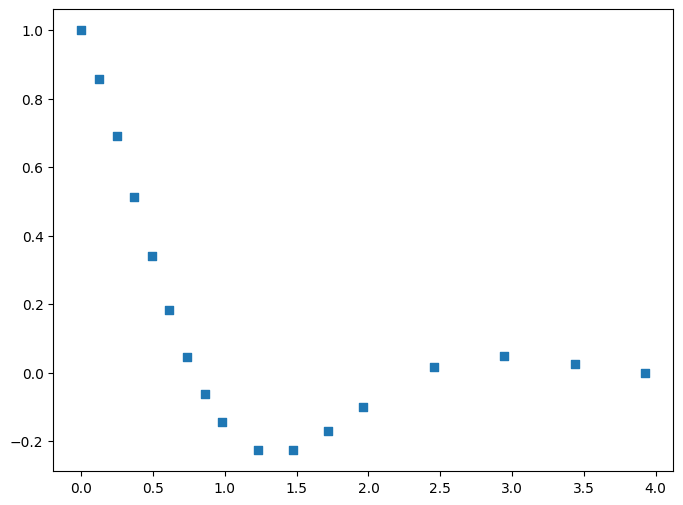

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_x, test_y, marker =',')
plt.show()

In [ ]:
#1

## 재귀함수로 Simpson을 만들었을 때, 중간 계산값 (단계별로 더했을 때) 출력을 할 줄 모르겠음
def f1(x):
  return 4/(1+x**2)

def f2(x):
  return 8*(np.sqrt(1-x**2) - x)

simpson result = 3.141592651224822


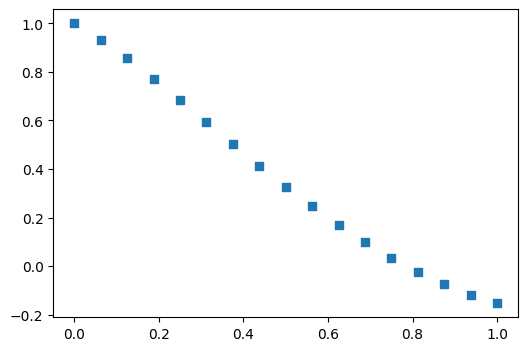

In [ ]:
t1 = Simpson(f1, 0, 1, 5e-6, 1, 4)
x1 = np.array(list(t1[2]))
y1 = f_test(x1)
print('simpson result = {}'.format(t1[1]))
plt.figure(figsize=(6, 4))
plt.scatter(x1, y1, marker =',')
plt.show()

simpson result = 3.141592651224822


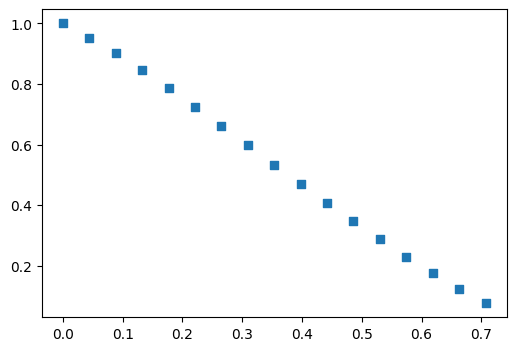

In [ ]:
t2 = Simpson(f2, 0, 1/np.sqrt(2), 5e-6, 1, 4)
x2 = np.array(list(t2[2]))
y2 = f_test(x2)
print('simpson result = {}'.format(t1[1]))
plt.figure(figsize=(6, 4))
plt.scatter(x2, y2, marker =',')
plt.show()

In [ ]:
#7
#열린 뉴턴-코츠 공식과 오차항

def f7(x):
  return 1/np.sqrt(1-x**2)

a = -1
b = 1
c = (a+b)/2

c31 = a + (b-a)/3
c32 = a + 2*(b-a)/3

c41 = a + 1 *(b-a)/4
c42 = a + 2 *(b-a)/4
c43 = a + 3 *(b-a)/4

c51 = a + 1 *(b-a)/5
c52 = a + 2 *(b-a)/5
c53 = a + 3 *(b-a)/5
c54 = a + 4 *(b-a)/5

c61 = a + 1 *(b-a)/6
c62 = a + 2 *(b-a)/6
c63 = a + 3 *(b-a)/6
c64 = a + 4 *(b-a)/6
c65 = a + 5 *(b-a)/6

#중점 공식

t71 = 2*(b-a)/2 *(f7(c))
print('중점 공식 : {}'.format(t71))

#2개의 점을 이용한 뉴턴-코츠 열린 공식

t72 = 1.5*(b-a)/3 *(f7(c31)+f7(c32))
print('뉴턴-코츠 열린 공식 (점 2개) 공식 : {}'.format(t72))

#3개의 점을 이용한 뉴턴-코츠 열린 공식
t73 = 4/3*(b-a)/4 *(2*f7(c41)-f7(c42)+2*f7(c43))
print('뉴턴-코츠 열린 공식 (점 3개) 공식 : {}'.format(t73))

#4개의 점을 이용한 뉴턴-코츠 열린 공식
t74 = 5/24*(b-a)/5 *(11*f7(c51) + f7(c52) +f7(c53) + 11*f7(c43))
print('뉴턴-코츠 열린 공식 (점 4개) 공식 : {}'.format(t74))

#5개의 점을 이용한 뉴턴-코츠 열린 공식
t75 = 6/20*(b-a)/6 *(11*f7(c61) - 14*f7(c62) +26*f7(c63) - 14*f7(c64) + 11*f7(c65))
print('뉴턴-코츠 열린 공식 (점 5개) 공식 : {}'.format(t75))

중점 공식 : 2.0
뉴턴-코츠 열린 공식 (점 2개) 공식 : 2.1213203435596424
뉴턴-코츠 열린 공식 (점 3개) 공식 : 2.4125347690113377
뉴턴-코츠 열린 공식 (점 4개) 공식 : 2.3744122812075905
뉴턴-코츠 열린 공식 (점 5개) 공식 : 2.5817612493162234


# 5.4 가우스 구적법

대부분의 수치 적분 공식은 다음 형태를 보인다.

$$\int^{b}_{a}{f(x)dx} \approx A_{0}f(x_{0}) + A_{1}f(x_{1}) + \cdots + A_{n}f(x_{n})$$

여기서 $A_{i}$를 가중치라하고 이 가중치를 아는 방법 중 하나로 4장에 제시된 다항식의 보간 이론이 있다.

분할점들이 고정된 경우 라그랑주 보간 공식을 이용하면 다음과 같다.

$$p(x) = \sum^{n}_{i=0}{f(x_{i})l_{i}}, \:\:\:\: l_{i} = \prod^{n}_{j=0, j\neq i}{(\frac{x-x_{j}}{x_{i}-x_{j}})}$$

$$\int^{b}_{a}{f(x)dx} \approx \int^{b}_{a}{p(x)dx} = \sum^{n}_{i=0}{f(x_{i})}\int^{b}_{a}{l_{i}(x)dx} = \sum^{n}_{i=0}{A_{i}f(x_{i})}$$

예시로 구간이 $[-2, 2]$, 분할점이 $-1, 0, 1$일 때, 위의 구적법 공식에서 가중치를 결정하면 다음과 같다.

\begin{eqnarray}
    l_{0}(x) & = & \frac{1}{2}x(x-1) \\
    l_{1}(x) & = & -(x+1)(x-1) \\
    l_{2}(x) & = & \frac{1}{2}x(x+1) \\
\end{eqnarray}

이를 통해 $A_{0} = \frac{8}{3}, A_{1} = -\frac{4}{3}, A_{2} = \frac{8}{3}$을 얻을 수 있다. 따라서 구적법 식은 다음과 같다.

$$\int^{2}_{-2}{f(x)dx} \approx \frac{8}{3}f(-1)  -\frac{4}{3}f(0) + \frac{8}{3}f(1)$$

이 계산에 대한 검토로 식이 세 개의 단항식 $f(x) = 1, x, x^{2}$에 대하여 정확한 값을 주는지 확인해 볼 수 있다.

- 구간 변환

수치 적분을 위한 가우스 공식은 대개 $[0,1]$ 또는 $[-1, 1]$과 같은 구간에서 주어진다. 이를 다른 구간에서도 사용하기 위하여 선형 변수 변환을 통하여 다른 구간에 대한 공식을 도출할 수 있다.

첫 번쨰 수식이 첫 구간에서 특정 차수의 다항식에 대하여 정확하다면 두 번째 구간에 대해서도 마찬가지가 성립한다.

다음과 같은 수치 적분 공식이 주어져 있다고 하자.

$$\int^{d}_{c}{f(t)dt} \approx \sum^{n}_{i=0}{A_{i}f(t_{i})}$$

이 식이 최대 $m$차 이하의 다항식에 대해 정확하다고 가정하자. 다른 구간 $[a,b]$에 대한 공식을 도출하기 위해 $t$에 대한 $1$차 함수 $\lambda$를 정의한다.

$$x=\lambda(t) = (\frac{b-a}{d-c})t + (\frac{ad-bc}{d-c})$$

이를 통해 치환하면 다음과 같다.

\begin{eqnarray}
\int^{b}_{a}{f(x)dx} & \approx & (\frac{b-a}{d-c})\sum^{n}_{i=0}{A_{i}f(\lambda(t_{i}))} \\
&  \approx & (\frac{b-a}{d-c})\sum^{n}_{i=0}{A_{i}f((\frac{b-a}{d-c})t_{i} + (\frac{ad-bc}{d-c}))}
\end{eqnarray}

- 가우스 구적법 공식

수학자 가우스는 분할점을 특수하게 정함으로써 수치 적분 과정의 정확성이 크게 향상될 수 있음을 발견했다.

$\ulcorner$


$\boxtimes$ **정리 1** 가우스 구적법 정리

$q$가 $0$이 아닌 (nontrivial) $(n+1)$차의  다음과 같은 다항식이라 하자.

$$ \int^{b}_{a}{x^{k}q(x)dx} = 0 \:\:\: (0\leq k \;\leq n)$$

$x_{0}, x_{1}, \cdots, x_{n}$이 $q$의 근이라 할 때, $x_{i}$들을 분할점으로 갖는 다음 공식은 최대 ($2n+1$) 차의 모든 다항식에 대하여 정확하다.

또한 분할점들은 열린구가 $(a, b)$에 속한다.



**증명**

$(2n+!)$ 이하 차수인  다항식 $f$를 $q$로 나누면 몫 $p$와 나머지 $r$을 얻을 수 있고, 이들은 $n$ 이하의 차수를 갖는다.

$$f = pq + r$$

가정에 의해, $\int^{b}_{a}{q(x)p(x)dx} = 0$이다. 게다가 각각의 $x_{i}$가 $q$의 근이기 때문에 $f(x_{i}) = p(x_{i})q(x_{i}) + r(x_{i}) = r(x_{i})$이다. 마지막으로 $r$의 차수가 최대 $n$이므로 공식 $\int^{b}_{a}{r(x)dx} = \sum^{n}_{i=0}{A_{i}r(x_{i})} = \sum^{n}_{i=0}{A_{i}f(x_{i})}$

$\lrcorner$


예시로 3개의 가우스 분할점과 3개의 가중치를 가지는 다음 적분에 대한 가우스 구적법 공식을 찾을 수 있다.

$$\int^{1}_{-1}{f(x)dx}$$

먼저 $n=2$, $q$의 차수는 $3$이므로 다음과 같은 형태를 갖는다.

$$q(x) = c_{0} + c_{1}x + c_{2}x^{2} + c_{3}x^{3}$$

가우스 구적법 정리를 이용하여 최대 $2n+1$차의 동차 방정식을 만족한다.

계산의 편리를 위해 $c_{0}=c_{2}=0$이라면, $q(x) = c_{1}x + c_{3}x^{3}$이다. 이 식의 간단한 해는, $c_{1} = -3, c_{3} = 5$이다. 그리고 $q$의 근은 $-\sqrt{3/5}, 0, \sqrt{3/5}$이다.

이제 가중치를 구할 것이다. 위 증명에서 보았듯, $f$는 최대 $n=2$차의 다항식에 대하여 정확하다. 이를 통해, $A_{0} = A_{2} = \frac{5}{9}, A_{1} = \frac{8}{9}$이다.

최종적으로 공식은 다음과 같다.

$$\int^{b}_{a}{f(x)dx} \approx \frac{5}{9}f(-\sqrt{\frac{3}{5}}) + \frac{8}{9}f(0) +\frac{5}{9}f(\sqrt{\frac{3}{5}})$$

위 식은 5차 다항식을 포함한 모든 차수의 다항식을 정확히 적분한다.

In [2]:
#1


0.8872983346207417